# Modulation Classification

## Imports

In [16]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize 
from scipy.integrate import cumtrapz
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
import keras.models as models
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Sequential
import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from keras.models import Sequential


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PATH = "/content/drive/MyDrive/Pattern Recognition/Modulation Classification/RML2016.10b.tar.bz2"

## Dowload Dataset

In [4]:
%cp -av "/content/drive/MyDrive/Pattern Recognition/Modulation Classification/RML2016.10b.tar.bz2" "/content/dataset"

'/content/drive/MyDrive/Pattern Recognition/Modulation Classification/RML2016.10b.tar.bz2' -> '/content/dataset/RML2016.10b.tar.bz2'


In [5]:
!tar xjvf "/content/dataset/RML2016.10b.tar.bz2"

RML2016.10b.dat
LICENSE.TXT


In [ ]:
with open("/content/RML2016.10b.dat", 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()

In [6]:
file = open("/content/RML2016.10b.dat",'rb')
Xd = pickle.load(file, encoding = 'bytes')
snrs, mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = [] 
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)
file.close()

## Visualization

In [7]:
def randomVisualization():
  mod = lbl[0][0]
  idx = []
  res = []
  idx.append([0, mod.decode("utf-8"), lbl[0][1]])
  for i in range(len(lbl)):
    if lbl[i][0] == mod:
      continue
    idx.append([i-1, mod.decode("utf-8"), lbl[i-1][1]])
    mod = lbl[i][0]
    idx.append([i, mod.decode("utf-8"), lbl[i][1]])
  idx.append([i-1, lbl[i-1][0].decode("utf-8"), lbl[i-1][1]])
  return idx

In [8]:
def plotFigures(idx):
  i = 0
  while i < len(idx):
    # plt.figure()
    # plt.title(str(id[1]) + " SNR = " + str(id[2]))
    # plt.plot(X[id[0]][0])
    # plt.plot(X[id[0]][1])

    fig, axs = plt.subplots(1,2, figsize=(20,5))
    axs[0].plot(X[idx[i][0]][0])
    axs[0].plot(X[idx[i][0]][1])
    axs[0].set_title(str(idx[i][1]) + ", SNR = " + str(idx[i][2]))
    axs[1].plot(X[idx[i+1][0]][0])
    axs[1].plot(X[idx[i+1][0]][1])
    axs[1].set_title(str(idx[i+1][1]) + ", SNR = " + str(idx[i+1][2]))
    i += 2


In [ ]:
X.shape

(1200000, 2, 128)

In [ ]:
idx = randomVisualization()
plotFigures(idx)

## Create Features

1. Raw time series as given (two channels)
2. First derivative in time (two channels)
3. Integral in time (two channels)
4. combinations of 1,2 and 3. (More channels)

In [ ]:
features = {}

In [ ]:
features['raw']        = X[:,0], X[:,1]

In [ ]:
features['derivative'] = normalize(np.gradient(X[:,0], axis = 1)), normalize(np.gradient(X[:,1], axis = 1))

In [ ]:
features['integral']   = normalize(np.cumsum(X[:,0], axis = 1)), normalize(np.cumsum(X[:,1], axis = 1))

In [ ]:
features['raw'][1].shape

(1200000, 128)

In [10]:
X = np.vstack(X)
X = np.asarray(X)
X = np.reshape(X, (1200000,256))

scaler = StandardScaler()
X = scaler.fit_transform(X)
lbl = np.asarray(lbl) 


In [11]:
X_deriv = []
for x in X:
  X_deriv.append(np.gradient(x))

X_int = []
for x in X:
  X_int.append(cumtrapz(x, initial=0))

# X_combined = []
# for x,x_d,x_i in zip(X,X_deriv,X_int):
#   X_combined.append(np.concatenate((x, x_d, x_i), axis=0))

In [12]:
X_deriv = np.asarray(X_deriv)

In [13]:
X_int = np.asarray(X_int)

In [ ]:
X_combined = np.asarray(X_combined)

In [9]:
y = np.array(lbl)

le = preprocessing.LabelEncoder()
le.fit(y[:,0])
y = le.transform(y[:,0])
y_new=[]
for i in range(len(y)):
  y_new.append([y[i],lbl[i][1]])

y=np.array(y_new)

In [108]:
np.unique(np.array(lbl)[:,0])

array([b'8PSK', b'AM-DSB', b'BPSK', b'CPFSK', b'GFSK', b'PAM4', b'QAM16',
       b'QAM64', b'QPSK', b'WBFM'], dtype='|S21')

In [10]:
lbls = np.unique(np.array(lbl)[:,0])
classes = []
for c in lbls: 
  classes.append(c.decode("utf-8"))

In [11]:
snrs = np.unique(np.array(lbl)[:,1])
lbl_snrs = []
for snr in snrs: 
  lbl_snrs.append(int(snr.decode("utf-8")))
lbl_snrs.sort()

## Split Data

In [14]:
# X_train, X_test, y_train, y_test = train_test_split(X, lbl, test_size=0.3, random_state=0)
# X_deriv_train, X_deriv_test, y_deriv_train, y_deriv_test = train_test_split(X_deriv, lbl, test_size=0.3, random_state=0)
# X_int_train, X_int_test, y_int_train, y_int_test = train_test_split(X_int, lbl, test_size=0.3, random_state=0)
# X_combined_train, X_combined_test, y_combined_train, y_combined_test = train_test_split(X_combined, lbl, test_size=0.3, random_state=0)

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(X, lbl, train_size=0.7, test_size=0.3, stratify=lbl)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=19/20, test_size=1/20,stratify=y_train)

# x_deriv_train, x_deriv_test, y_deriv_train, y_deriv_test = train_test_split(X, lbl, train_size=0.7, test_size=0.3, stratify=lbl)
# x_deriv_train, x_deriv_val, y_deriv_train, y_deriv_val = train_test_split(x_deriv_train, y_deriv_train, train_size=19/20, test_size=1/20,stratify=y_deriv_train)

# x_int_train, x_int_test, y_int_train, y_int_test = train_test_split(X, lbl, train_size=0.7, test_size=0.3, stratify=lbl)
# x_int_train, x_int_val, y_int_train, y_int_val = train_test_split(x_int_train, y_int_train, train_size=19/20, test_size=1/20,stratify=y_int_train)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=lbl)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=19/20, test_size=1/20,stratify=y_train)

In [111]:
x_train = x_train.reshape(x_train.shape[0],1,x_train.shape[1],x_train.shape[2])
x_val = x_val.reshape(x_val.shape[0],1,x_val.shape[1],x_val.shape[2])
x_test = x_test.reshape(x_test.shape[0],1,x_test.shape[1],x_test.shape[2])

In [68]:
print(x_train.shape[:])

(798000, 2, 128)


In [38]:
y_train[0]

array([1, 6])

In [54]:
y_train[0]

array([ 7, 10])

## CNN Model

### Functions

In [13]:
def plot_evaluation(model_history):
  plt.plot(model_history.history['accuracy'], label='accuracy')
  plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  plt.title("Train vs val accuracy")
  plt.show()

  plt.plot(model_history.history['loss'])
  plt.plot(model_history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()


In [14]:
def plot_confusion_matrix(y_test, y_test_hat):
  cm = confusion_matrix(y_test[:,0], y_test_hat)
  # Plotting the confusion matrix
  plt.imshow(cm, cmap='Blues', aspect='auto')
  plt.colorbar()
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.xticks(np.arange(len(classes)), classes)
  plt.yticks(np.arange(len(classes)), classes)
  # Adding numbers to the cells
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
  plt.gcf().set_size_inches(10, 8)
  plt.show()

In [15]:
def plot_per_snr(y_test, y_test_hat):
  per_snr = []
  for snr in lbl_snrs:
    idx = np.where(y_test[:,1]==int(snr))
    acc = accuracy_score(y_test[idx][:,0], y_test_hat[idx])
    per_snr.append(acc)
  plt.plot(lbl_snrs, per_snr)
  plt.xlabel('SNR')
  plt.ylabel('Accuracy')
  plt.title('Accuracy per SNR')
  plt.show()

In [ ]:
def evaluate_model(model_history, y_test, y_test_hat):
  plot_evaluation(model_history)
  


### Model

In [9]:
model = keras.models.Sequential()
model.add(Reshape(list(x_train.shape[1:])+[1], input_shape=list(x_train.shape[1:])))
model.add(ZeroPadding2D((0, 2)))
model.add(Conv2D(64, (1, 3),padding='valid', activation="relu", name="conv1",kernel_initializer='glorot_uniform',data_format="channels_last"))
model.add(Dropout(0.5))
model.add(ZeroPadding2D((0, 2)))
model.add(Conv2D(16,(2, 3), padding='valid', activation="relu", name="conv2", kernel_initializer='glorot_uniform',data_format="channels_last"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_normal', name="dense1"))
model.add(Dropout(0.5))
model.add(Dense( 10, kernel_initializer='he_normal', name="dense2" ))
model.add(Activation('softmax'))
model.add(Reshape([10]))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 2, 128, 1)         0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 2, 132, 1)        0         
 2D)                                                             
                                                                 
 conv1 (Conv2D)              (None, 2, 130, 64)        256       
                                                                 
 dropout (Dropout)           (None, 2, 130, 64)        0         
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 2, 134, 64)       0         
 ng2D)                                                           
                                                                 
 conv2 (Conv2D)              (None, 1, 132, 16)        6

In [10]:
history = model.fit(x_train,
    y_train[:,0],
    batch_size=1024,
    epochs=20,
    verbose=2,
    validation_data=(x_val, y_val[:,0]),
    callbacks = [
         keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
    ])

Epoch 1/20
780/780 - 25s - loss: 1.8830 - accuracy: 0.2577 - val_loss: 1.5046 - val_accuracy: 0.4025 - 25s/epoch - 32ms/step
Epoch 2/20
780/780 - 15s - loss: 1.5016 - accuracy: 0.3883 - val_loss: 1.3393 - val_accuracy: 0.4412 - 15s/epoch - 19ms/step
Epoch 3/20
780/780 - 15s - loss: 1.4097 - accuracy: 0.4166 - val_loss: 1.2842 - val_accuracy: 0.4676 - 15s/epoch - 19ms/step
Epoch 4/20
780/780 - 15s - loss: 1.3663 - accuracy: 0.4317 - val_loss: 1.2386 - val_accuracy: 0.4813 - 15s/epoch - 19ms/step
Epoch 5/20
780/780 - 15s - loss: 1.3434 - accuracy: 0.4397 - val_loss: 1.2325 - val_accuracy: 0.4831 - 15s/epoch - 19ms/step
Epoch 6/20
780/780 - 15s - loss: 1.3290 - accuracy: 0.4440 - val_loss: 1.2289 - val_accuracy: 0.4796 - 15s/epoch - 19ms/step
Epoch 7/20
780/780 - 15s - loss: 1.3196 - accuracy: 0.4473 - val_loss: 1.2236 - val_accuracy: 0.4840 - 15s/epoch - 19ms/step
Epoch 8/20
780/780 - 15s - loss: 1.3103 - accuracy: 0.4513 - val_loss: 1.2260 - val_accuracy: 0.4834 - 15s/epoch - 20ms/step


### Evaluation

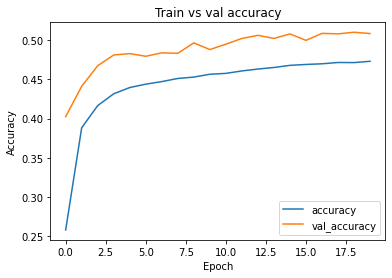

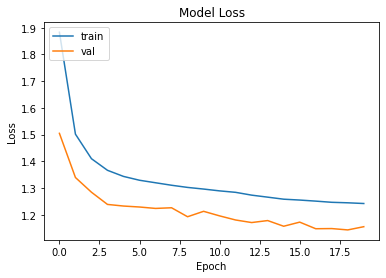

In [17]:
plot_evaluation(history)

In [111]:
y_hat = model.predict(x_test)
res = []
for test in y_hat:
  res.append(np.argmax(test))
res = np.array(res)

11250/11250 [==============================] - 27s 2ms/step


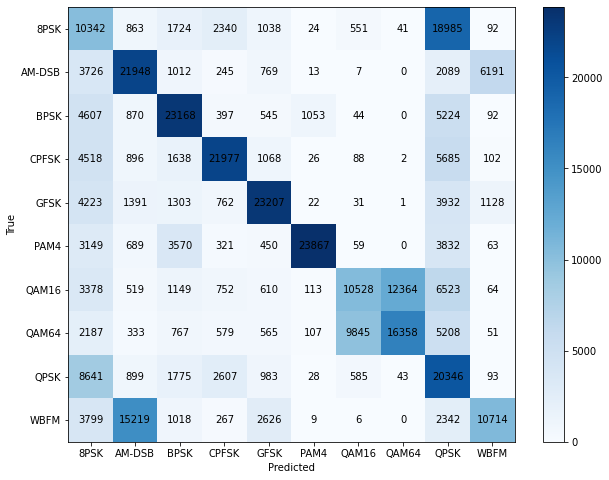

In [112]:
plot_confusion_matrix(y_test, res)

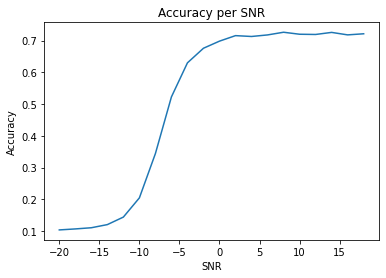

In [127]:
plot_per_snr(y_test, res)

## Vanilla RNN Model